<a href="https://colab.research.google.com/github/Deb052024/Machine-Prediction/blob/main/Mobile_Handset_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')
#!pip install -q ray==2.10.0
#!pip install -q autogluon.tabular
from autogluon.tabular import TabularDataset, TabularPredictor

In [2]:
df=pd.read_excel('/content/Processed_Flipdata.xlsx')

In [4]:
#info on the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    object 
 7   Front Camera   541 non-null    object 
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Prize          541 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 50.8+ KB


In [5]:
#Null value check
df.isnull().sum()

,0
Unnamed: 0,0
Model,0
Colour,0
Memory,0
RAM,0
Battery_,0
Rear Camera,0
Front Camera,0
AI Lens,0
Mobile Height,0


In [6]:
#EDA on the data set
df.describe()

,Unnamed: 0,Memory,RAM,Battery_,AI Lens,Mobile Height,Prize
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,289.711645,110.550832,5.397412,4871.587800,0.062847,16.431201,16228.375231
std,182.359185,60.600694,1.984923,780.148862,0.242911,2.523553,10793.588322
min,0.000000,16.000000,2.000000,800.000000,0.000000,4.500000,920.000000
25%,135.000000,64.000000,4.000000,5000.000000,0.000000,16.510000,9290.000000
50%,273.000000,128.000000,6.000000,5000.000000,0.000000,16.710000,13499.000000
75%,434.000000,128.000000,8.000000,5000.000000,0.000000,16.940000,19280.000000
max,642.000000,256.000000,8.000000,7000.000000,1.000000,41.940000,80999.000000


In [7]:
#Duplicate Value check
df.duplicated().sum()

0

In [8]:
#Renaming Prize Column to Price
df.rename(columns={'Prize':'Price'},inplace=True)

In [9]:
df.head()

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Price
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,11999
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,5649
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,8999


In [10]:
df.columns

Index(['Unnamed: 0', 'Model', 'Colour', 'Memory', 'RAM', 'Battery_',
       'Rear Camera', 'Front Camera', 'AI Lens', 'Mobile Height', 'Processor_',
       'Price'],
      dtype='object')

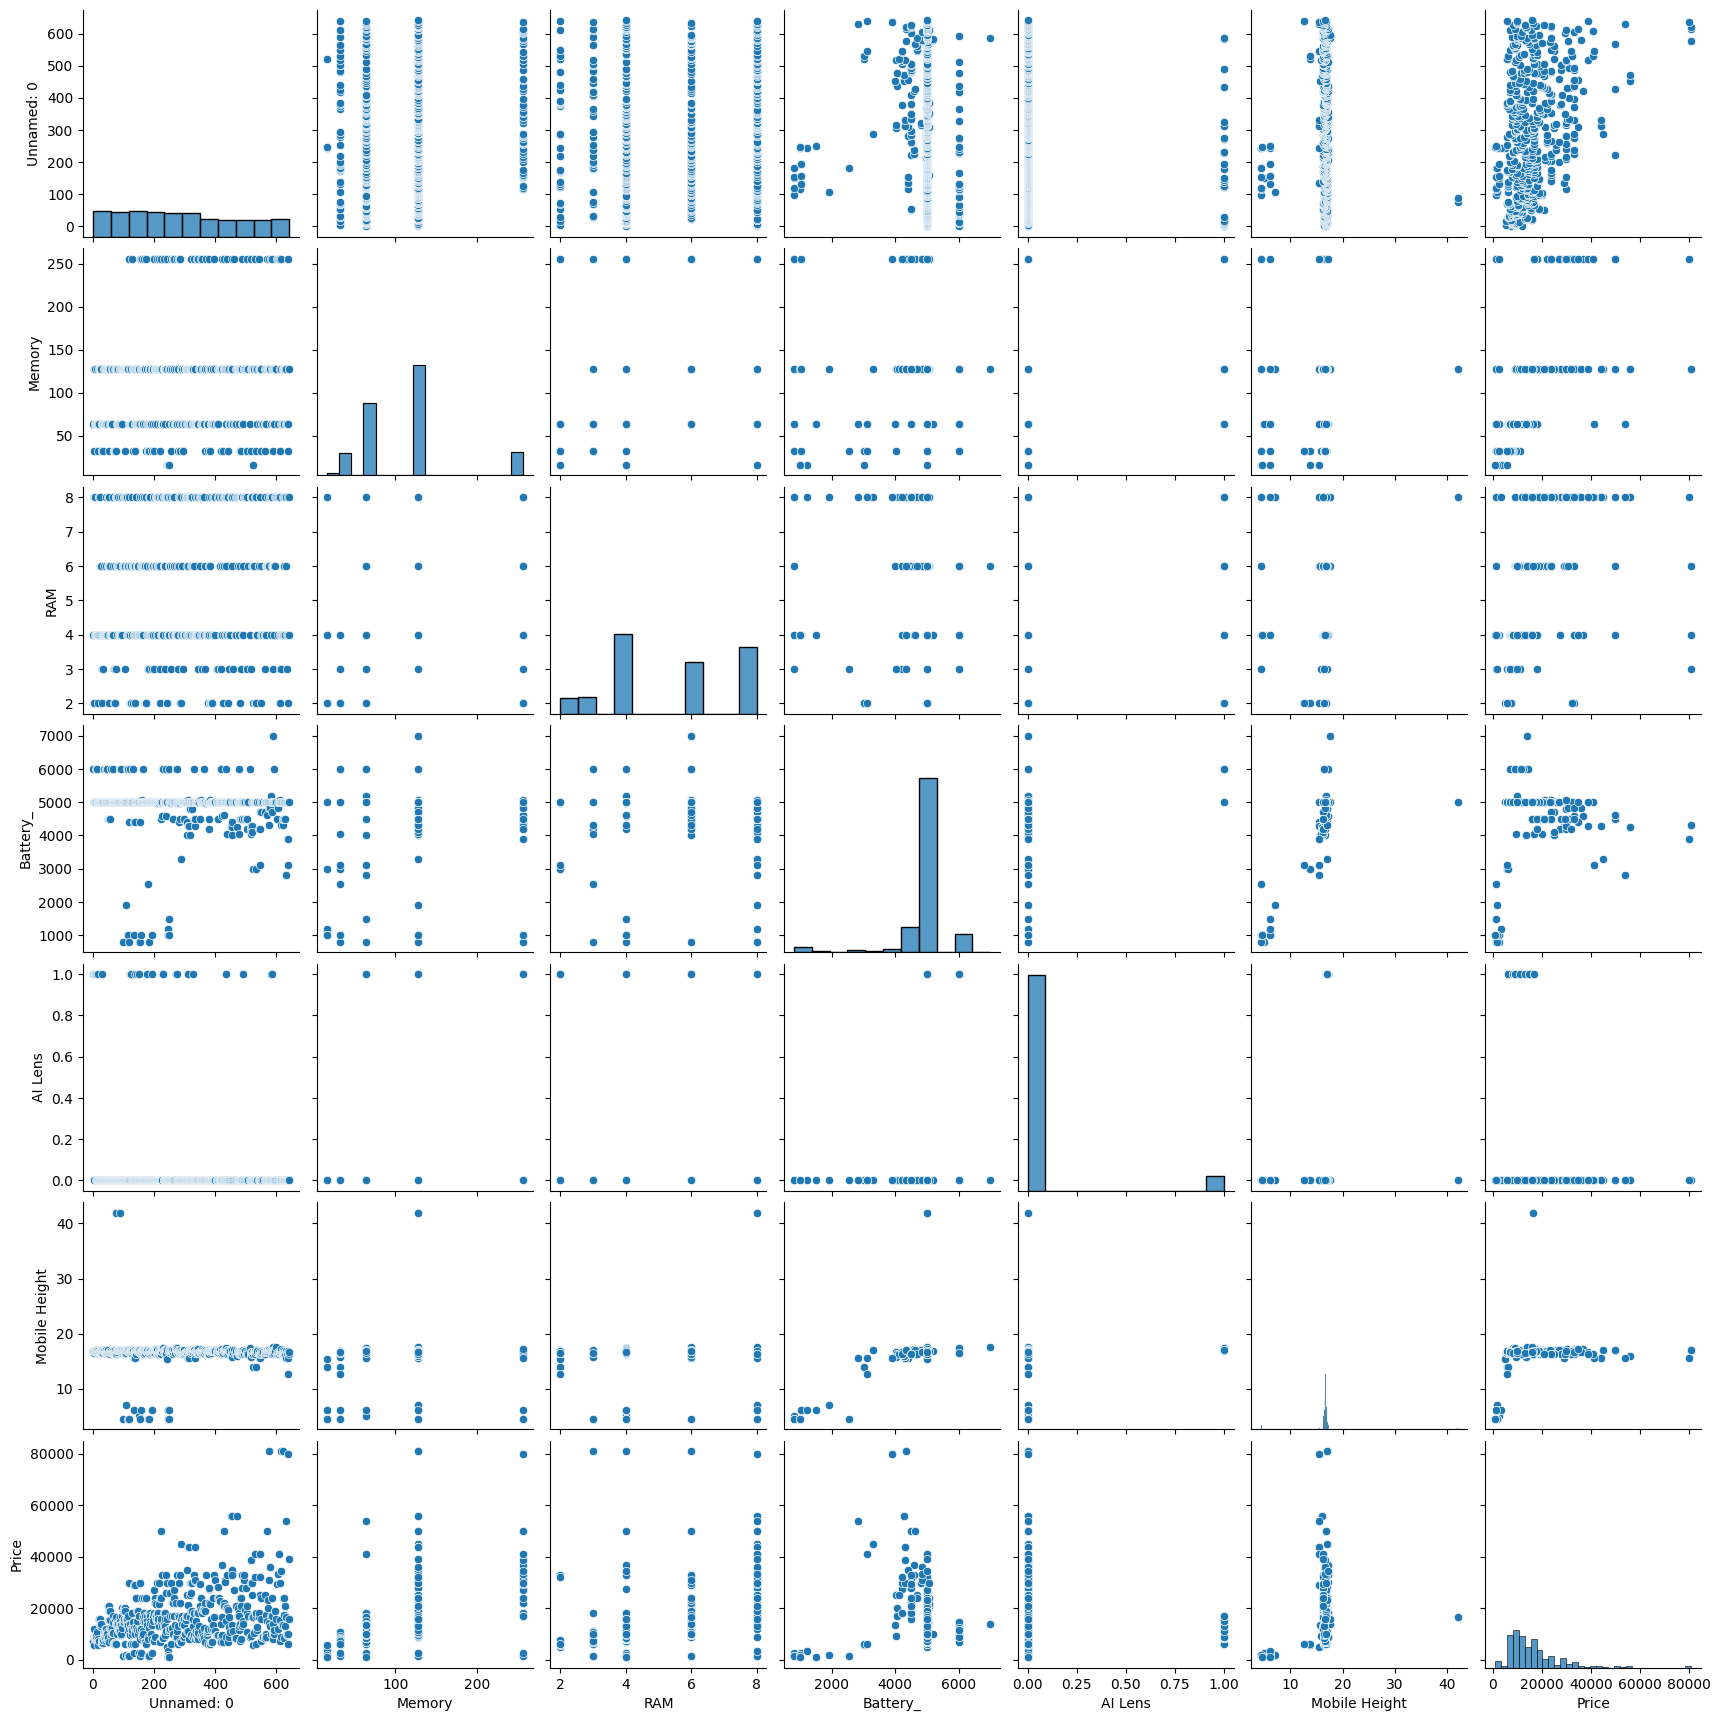

In [11]:
sns.pairplot(df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    object 
 7   Front Camera   541 non-null    object 
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor      541 non-null    object 
 11  Price          541 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 50.8+ KB


In [33]:
categorical_col=df[['Model','Colour','Rear Camera','Front Camera','Processor_']]
categorical_col

,Model,Colour,Rear Camera,Front Camera,Processor_
0,Infinix SMART 7,Night Black,13MP,5MP,Unisoc Spreadtrum SC9863A1
1,Infinix SMART 7,Azure Blue,13MP,5MP,Unisoc Spreadtrum SC9863A1
2,MOTOROLA G32,Mineral Gray,50MP,16MP,Qualcomm Snapdragon 680
3,POCO C50,Royal Blue,8MP,5MP,Mediatek Helio A22
4,Infinix HOT 30i,Marigold,50MP,5MP,G37
...,...,...,...,...,...
536,SAMSUNG Galaxy S23 5G,Cream,50MP,12MP,Qualcomm Snapdragon 8 Gen 2
537,LAVA Z21,Cyan,5MP,2MP,Octa Core
538,Tecno Spark 8T,Turquoise Cyan,50MP,8MP,MediaTek Helio G35
539,SAMSUNG Galaxy A54 5G,Awesome Lime,50MP,32MP,"Exynos 1380, Octa Core"


In [14]:
df['Model'].value_counts()

#df['Type Of Dwell'].value_counts().plot(kind='bar')

,count
Model,
vivo Y16,9
realme C55,9
SAMSUNG Galaxy A14 5G,9
REDMI Note 12 Pro 5G,9
vivo T1 44W,8
...,...
vivo Y1s,1
OnePlus Nord,1
Micromax 3,1


In [34]:
df_final=df.drop(['Unnamed: 0'],axis=1)

In [35]:
#Feature Values count,extraction and special attributes in Feature TreatMent
counter=3
def feature(df,columns,counter):
  for column in columns:
    feature_counts=df[column].value_counts()
    other_categories=feature_counts[feature_counts<counter].index
    df[column]=df[column].where(~df[column].isin(other_categories),'Lesser')

feature(df_final,categorical_col,counter)

# Optional: Print value counts for each column
for column in categorical_col:
    print(f"Value counts for {column}:")
    print(df_final[column].value_counts())
    print("\n")

Value counts for Model:
Model
Lesser                   144
SAMSUNG Galaxy A14 5G      9
REDMI Note 12 Pro 5G       9
vivo Y16                   9
realme C55                 9
                        ... 
realme Narzo 50            3
MOTOROLA g52               3
OPPO A17k                  3
realme 9 Pro+ 5G           3
vivo V25 Pro 5G            3
Name: count, Length: 89, dtype: int64


Value counts for Colour:
Colour
Lesser              295
Yellow               12
Power Black           8
Royal Blue            8
Black                 8
Midnight Black        7
Cool Blue             7
Aqua Blue             6
Glacier Blue          6
Force Black           6
Blue                  5
M3)                   5
Racing Black          5
OMG Black             5
Nebula Blue           5
Carbon Black          5
Light Green           5
Hyperspace            4
Light Silver          4
Horizon Blue          4
Dark Blue             4
Marine Blue           4
Light Blue            4
Night Sea             4
Pac

In [52]:
df_final['Model'].value_counts(['Lesser'])
#df['fuel_type'].isnull().value_counts()/len(df['fuel_type'])*100

,proportion
Model,
Lesser,0.266174
SAMSUNG Galaxy A14 5G,0.016636
REDMI Note 12 Pro 5G,0.016636
vivo Y16,0.016636
realme C55,0.016636
...,...
realme Narzo 50,0.005545
MOTOROLA g52,0.005545
OPPO A17k,0.005545


In [53]:
df_final.columns

Index(['Model', 'Colour', 'Memory', 'RAM', 'Battery_', 'Rear Camera',
       'Front Camera', 'AI Lens', 'Mobile Height', 'Processor_', 'Price'],
      dtype='object')

In [54]:
numerical_col=df_final[['Memory','RAM','Battery_','AI Lens','Mobile Height','Price']]
numerical_col

,Memory,RAM,Battery_,AI Lens,Mobile Height,Price
0,64,4,6000,1,16.76,7299
1,64,4,6000,1,16.76,7299
2,128,8,5000,0,16.64,11999
3,32,2,5000,0,16.56,5649
4,128,8,5000,1,16.76,8999
...,...,...,...,...,...,...
536,256,8,3900,0,15.49,79999
537,32,2,3100,0,12.70,5998
538,64,4,5000,0,16.76,9990
539,128,8,5000,0,16.26,38999


<Axes: >

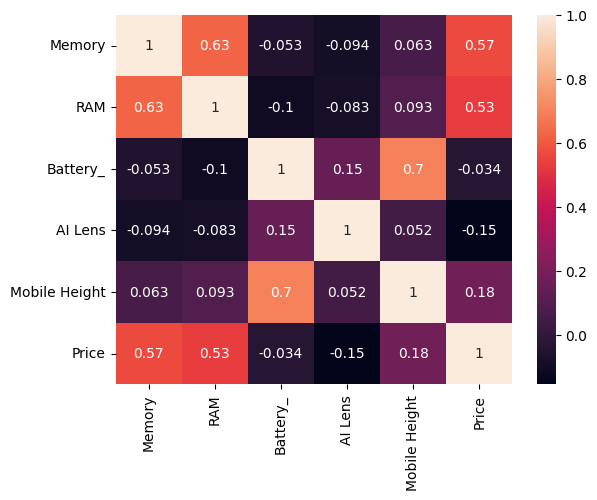

In [55]:
sns.heatmap(numerical_col.corr(),annot=True)

In [56]:
#Label Encoding the Categorical Features
le=LabelEncoder()
for column in categorical_col:
  df_final[column]=le.fit_transform(df_final[column])


<Axes: >

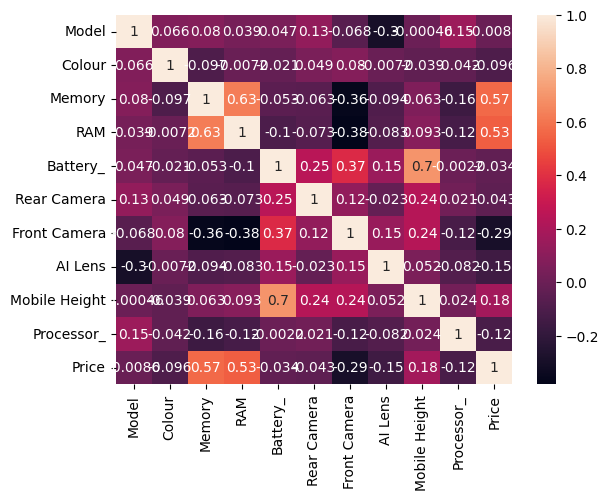

In [57]:
sns.heatmap(df_final.corr(),annot=True)

In [62]:
def find_skewness(df):
    # Select only numeric columns
    numeric_columns = df.select_dtypes(include=['number']).columns

    # Calculate skewness for each numeric column
    skewness = df[numeric_columns].skew()

    # Print skewness for each column
    for col, skew_value in skewness.items():
        print(f'Skewness of {col}: {skew_value:.4f}')

    return skewness

In [63]:
find_skewness(df_final)

Skewness of Model: 0.4641
Skewness of Colour: 0.2490
Skewness of Memory: 1.0297
Skewness of RAM: 0.0676
Skewness of Battery_: -3.3042
Skewness of Rear Camera: -0.7500
Skewness of Front Camera: -0.0729
Skewness of AI Lens: 3.6126
Skewness of Mobile Height: 1.1718
Skewness of Processor_: 0.1859
Skewness of Price: 2.4256


,0
Model,0.464149
Colour,0.248955
Memory,1.029704
RAM,0.067617
Battery_,-3.304250
Rear Camera,-0.749997
Front Camera,-0.072900
AI Lens,3.612638
Mobile Height,1.171778
Processor_,0.185926


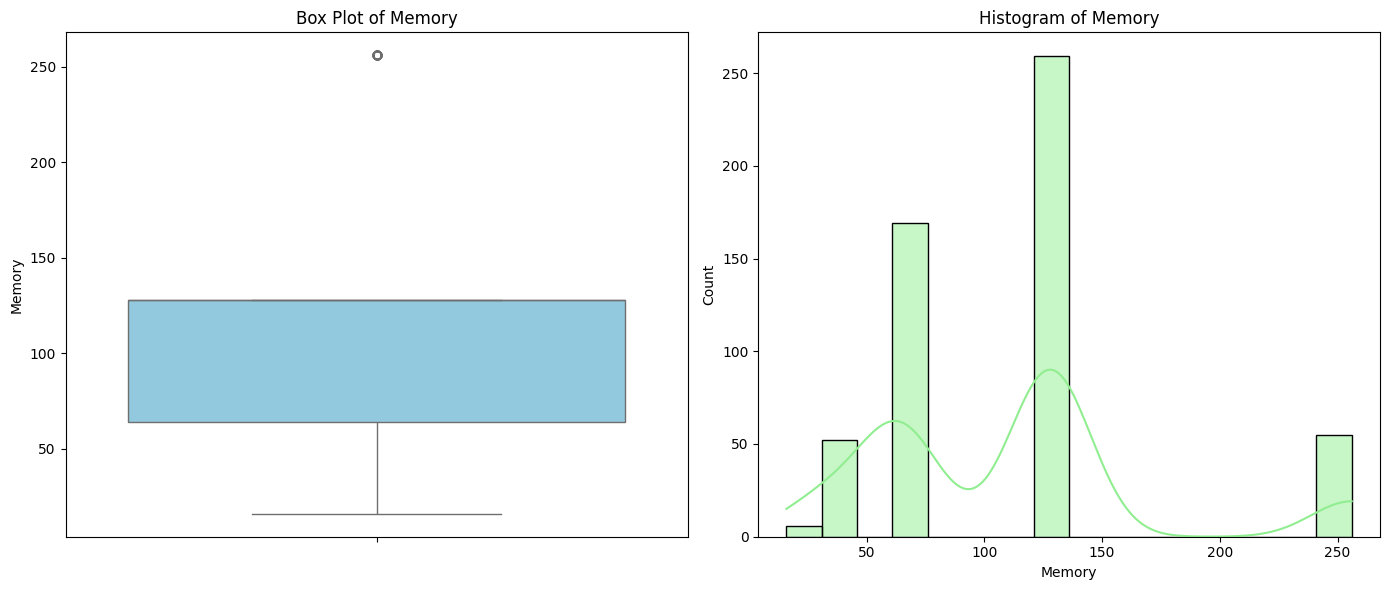

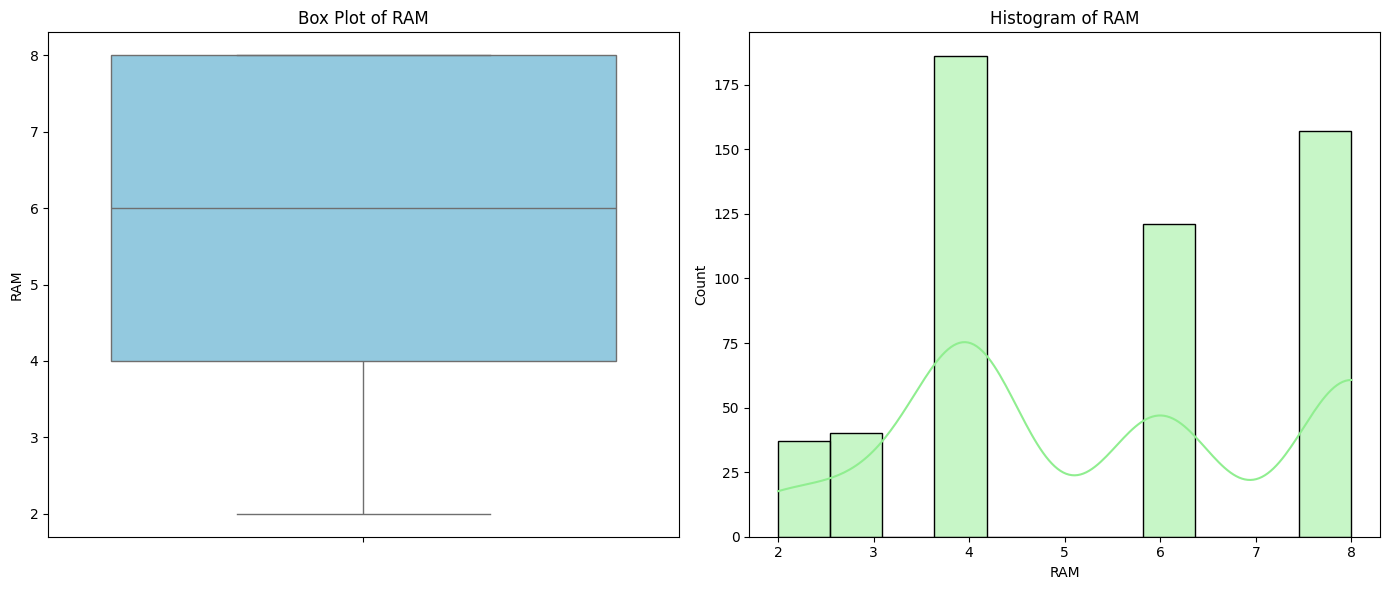

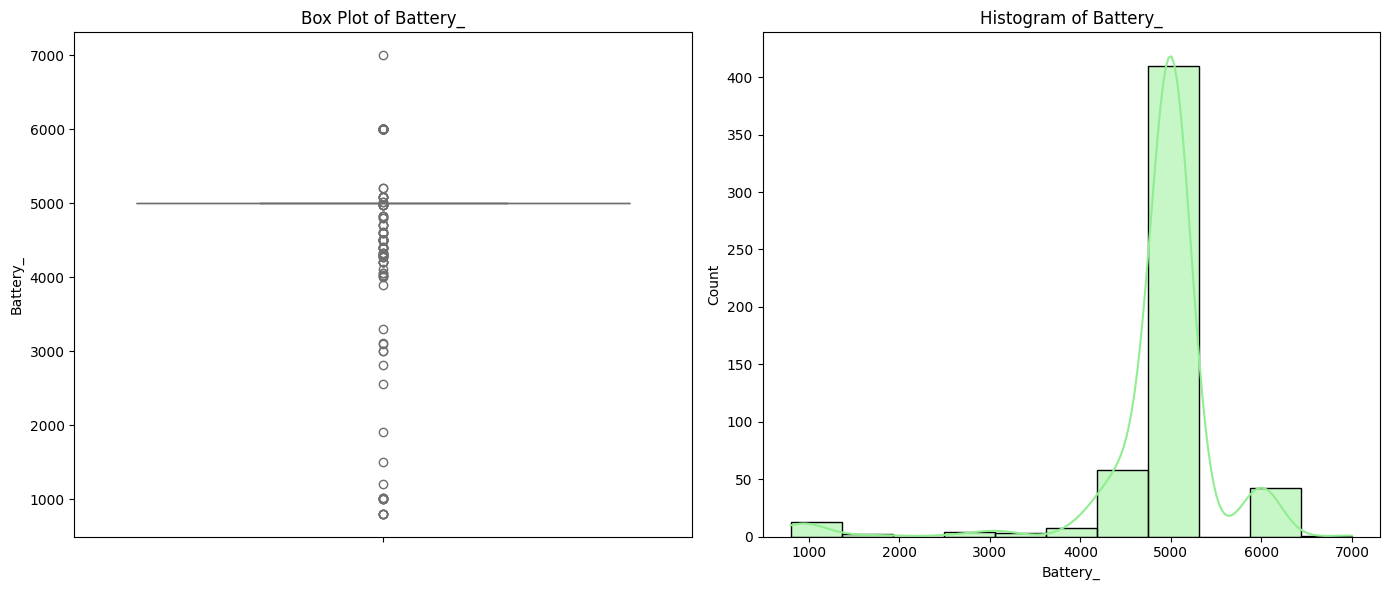

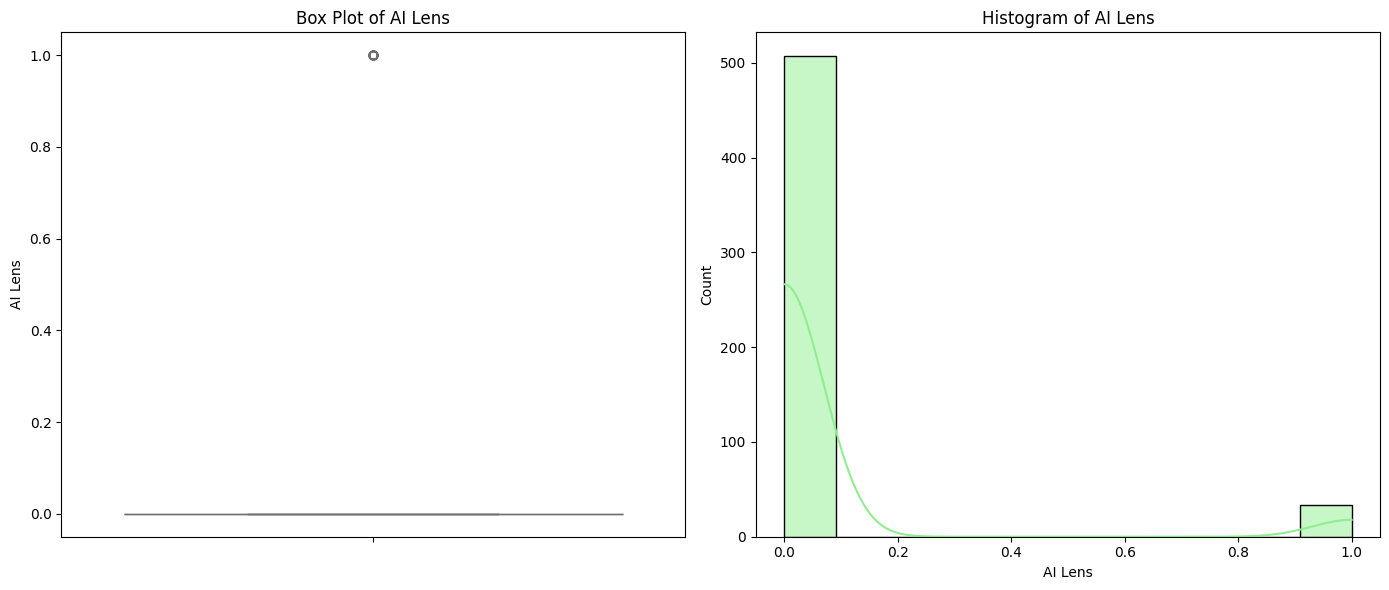

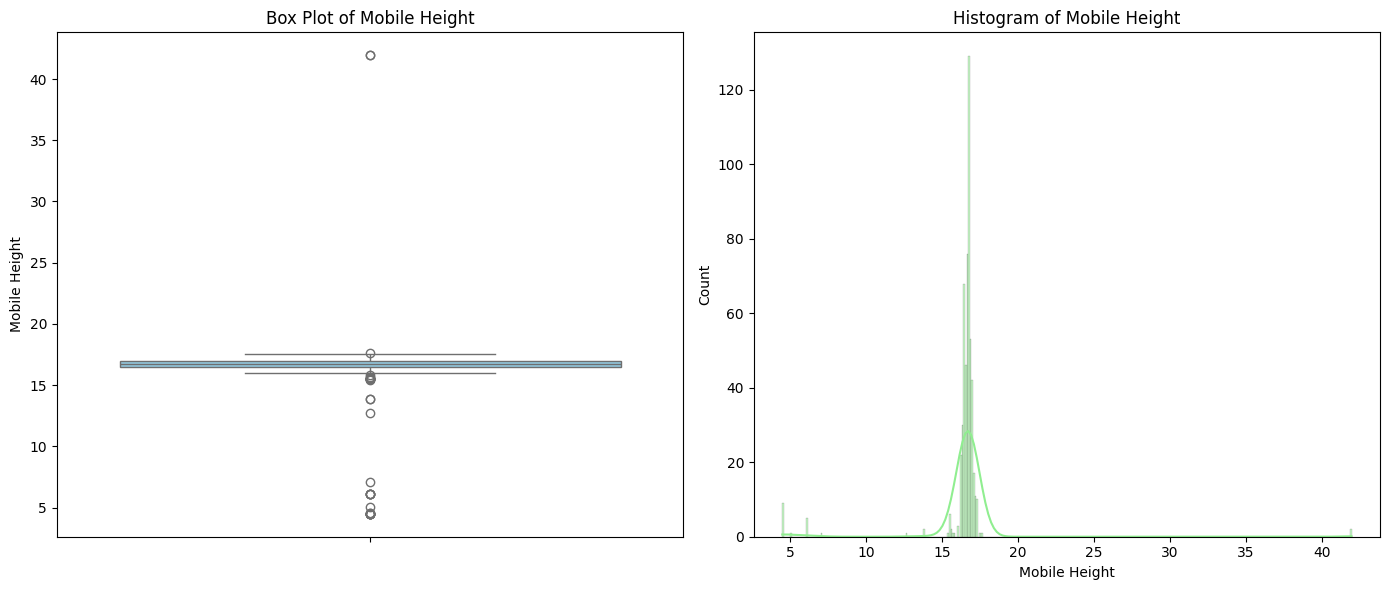

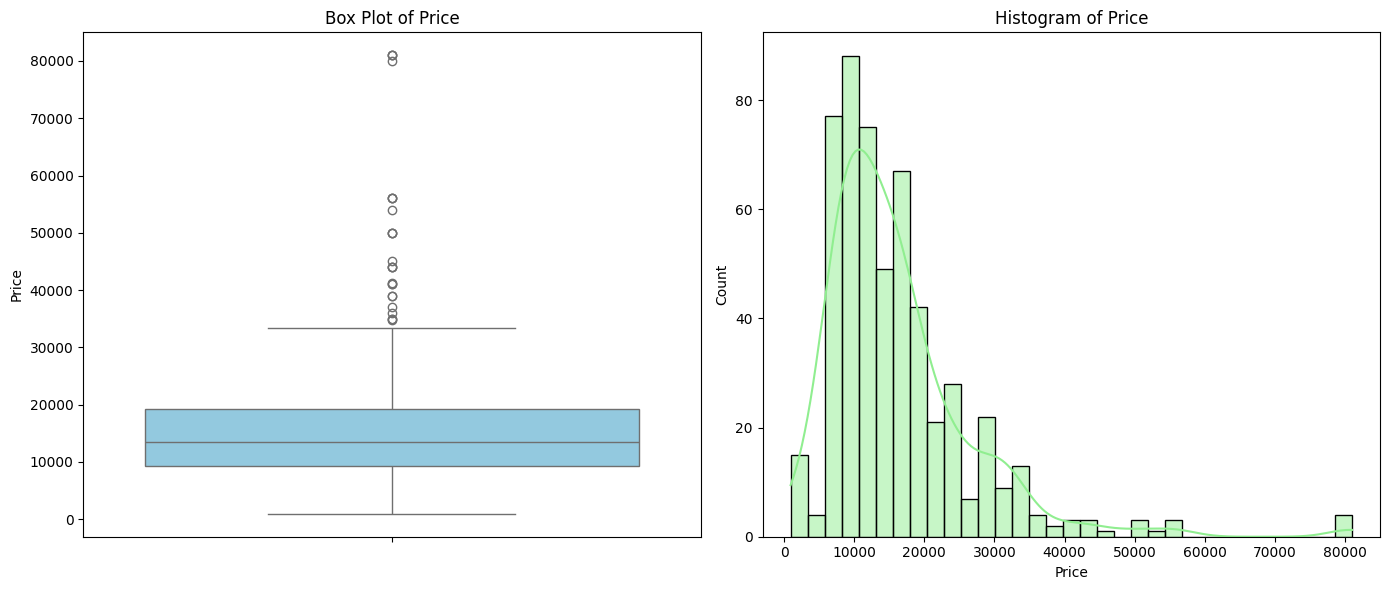

In [61]:

    for col in numerical_col:
        plt.figure(figsize=(14, 6))

        # Box plot
        plt.subplot(1, 2, 1)
        sns.boxplot(y=df_final[col], color='skyblue')
        plt.title(f'Box Plot of {col}')

        # Histogram
        plt.subplot(1, 2, 2)
        sns.histplot(df_final[col], kde=True, color='lightgreen')
        plt.title(f'Histogram of {col}')

        plt.tight_layout()
        plt.show()

        #Box Plot and HistPlot

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Model          541 non-null    object 
 1   Colour         541 non-null    object 
 2   Memory         541 non-null    int64  
 3   RAM            541 non-null    int64  
 4   Battery_       541 non-null    int64  
 5   Rear Camera    541 non-null    object 
 6   Front Camera   541 non-null    object 
 7   AI Lens        541 non-null    int64  
 8   Mobile Height  541 non-null    float64
 9   Processor      541 non-null    object 
 10  Price          541 non-null    int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 46.6+ KB


In [31]:
%%time

p = TabularPredictor(label='Price',
                            eval_metric='rmse',
                            problem_type='regression').fit(df,
                                                       presets='best_quality',
                                                        time_limit=3600*4,
                                                       excluded_model_types=['KNN','NN_TORCH'],
                                                       ag_args_fit={'num_gpus': 0}
                                                      )

No path specified. Models will be saved in: "AutogluonModels/ag-20240903_155143"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       10.27 GB / 12.67 GB (81.0%)
Disk Space Avail:   74.23 GB / 107.72 GB (68.9%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be

CPU times: user 1min 45s, sys: 2.5 s, total: 1min 48s
Wall time: 3min 15s


In [32]:
p.leaderboard()

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,ExtraTrees_r42_BAG_L2,-2952.276038,root_mean_squared_error,2.389174,17.635792,0.126177,1.269423,2,True,20
1,WeightedEnsemble_L3,-2952.276038,root_mean_squared_error,2.389939,17.674397,0.000766,0.038605,3,True,34
2,ExtraTrees_r197_BAG_L2,-3020.863781,root_mean_squared_error,2.382777,17.421962,0.119781,1.055593,2,True,31
3,ExtraTreesMSE_BAG_L2,-3020.863781,root_mean_squared_error,2.475887,17.347214,0.212891,0.980845,2,True,19
4,RandomForest_r16_BAG_L2,-3035.353929,root_mean_squared_error,2.385175,18.687670,0.122179,2.321301,2,True,32
5,RandomForestMSE_BAG_L2,-3035.353929,root_mean_squared_error,2.388291,18.559229,0.125294,2.192860,2,True,18
6,ExtraTrees_r49_BAG_L2,-3038.769553,root_mean_squared_error,2.402819,17.441298,0.139822,1.074929,2,True,24
7,RandomForest_r39_BAG_L2,-3056.495820,root_mean_squared_error,2.484671,18.722430,0.221675,2.356061,2,True,23
8,RandomForest_r195_BAG_L2,-3070.497446,root_mean_squared_error,2.385296,18.228150,0.122299,1.861782,2,True,21
9,RandomForest_r166_BAG_L2,-3085.193115,root_mean_squared_error,2.478039,17.624262,0.215043,1.257893,2,True,29
